#Práctica 2 SOC
####Ela Katherine Shepherd Arévalo
####Belén García Puente
####Víctor Santamaría Gredilla

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import collections

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


-------------------------------------------------------------------
#Estudio Erdos-Renyi

In [3]:
def estudio_red_ER(numnodos_list, p_list, num_iteraciones):
  for N in numnodos_list:
    count = 0
    for p in p_list:
      Grado_Medio = []
      Aristas_Media = []
      Camino_Corto = []
      Comp_conexa = []
      Grado_Cluster = []
      for x in range(num_iteraciones):
        grafo_erdos_renyi = nx.erdos_renyi_graph(N, p)
        #grado medio
        dgDict = dict(grafo_erdos_renyi.degree())
        average_degree = sum(dgDict.values()) / len(dgDict)
        Grado_Medio.append(average_degree)
        #numero de enlaces/numero de aristas
        aristas = len(grafo_erdos_renyi.edges)
        Aristas_Media.append(aristas)
        #media del camino mas corto - NO SE PUEDE HACER PORQUE EL GRAFO NO ESTÁ CONECTADO
        #camino = nx.average_shortest_path_length(grafo_erdos_renyi)
        #Camino_Corto.append(camino)
        #numero de componentes conexas
        cc = nx.number_connected_components(grafo_erdos_renyi)
        Comp_conexa.append(cc)
        #grado de clustering
        gc = nx.average_clustering(grafo_erdos_renyi)
        Grado_Cluster.append(gc)
      print("Nodos = " + str(N))
      print("p = " + str(p))
      if (count == 0):
        print("FASE SUBCRÍTICA")
      elif (count == 1):
        print("FASE CRÍTICA")
      elif (count == 2):
        print("FASE SUPERCRÍTICA")
      else:
        print("FASE CONECTADA")
      print("          ")
      print("MEDIDAS REALES")
      print("Grado medio = " + str(sum(Grado_Medio)/len(Grado_Medio)))
      print("Nº enlaces = " + str(sum(Aristas_Media)/len(Aristas_Media)))
      #print("Camino más corto = " + str(sum(Camino_Corto)/len(Camino_Corto)))     
      print("Grado de clustering = " + str(sum(Grado_Cluster)/len(Grado_Cluster)))
      print("Componentes conexas = " + str(sum(Comp_conexa)/len(Comp_conexa)))
      print("      ")
      print("MEDIDAS TEÓRICAS")
      print("Grado medio = " + str(p*(N-1)))
      print("Nº enlaces = " + str(p*((N*(N-1)/2))))
      #print("Camino más corto = " + str(np.log(N) / np.log(p*(N-1))))
      print("Grado de clustering = " + str((p*(N-1)) / N))
      #Grafica distribucion de grado
      total_deg = []
      for n, deg in grafo_erdos_renyi.degree():
        total_deg.append(deg)
      deg_cnt = collections.Counter(sorted(total_deg))
      deg, cnt = zip(*deg_cnt.items())
      cnt = tuple([x for x in cnt])
      plt.figure(figsize=(8,6))
      plt.bar(deg, cnt, width=0.9)
      plt.plot(deg, cnt, marker='o', color='red', alpha=0.5)
      
      plt.title("Distribucion de grado")
      plt.ylabel("Nº nodos")
      plt.xlabel("Grado")
      plt.show()
      count +=1
      print("-------------------------------------------------------")

### 500 nodos
Régimen Subcrítico​ → p < 1 / N /// 0,001

Punto Crítico​ → p = 1 / N // 0,002

Régimen Supercrítico​ → p > 1 / N // 0,005

Régimen Conectado → p > ln(N) / N // 0,012


Nodos = 1371
p = 0.001762
FASE SUBCRÍTICA
          
MEDIDAS REALES
Grado medio = 2.4070021881838075
Nº enlaces = 1650.0
Grado de clustering = 0.0011774512868604774
Componentes conexas = 134.0
      
MEDIDAS TEÓRICAS
Grado medio = 2.4139399999999998
Nº enlaces = 1654.75587
Grado de clustering = 0.0017607148067104303


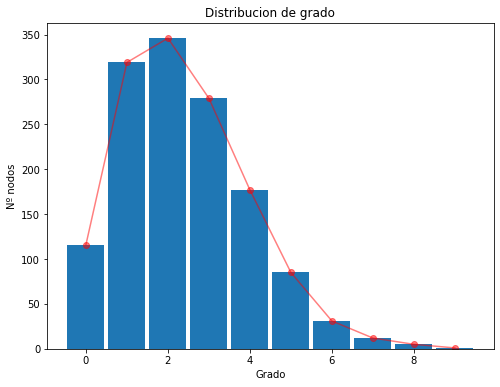

-------------------------------------------------------


In [4]:
estudio_red_ER([1371], [0.001762], 1)

### 10000 nodos
Régimen Subcrítico​ → p < 1 / N /// 0,000085

Punto Crítico​ → p = 1 / N // 0,0001

Régimen Supercrítico​ → p > 1 / N // 0,0005

Régimen Conectado → p > ln(N) / N // 0,001



Nodos = 10000
p = 8.5e-05
FASE SUBCRÍTICA
          
MEDIDAS REALES
Grado medio = 0.8519
Nº enlaces = 4259.5
Grado de clustering = 3.05e-05
Componentes conexas = 5740.8
      
MEDIDAS TEÓRICAS
Grado medio = 0.8499150000000001
Nº enlaces = 4249.575000000001
Grado de clustering = 8.499150000000001e-05


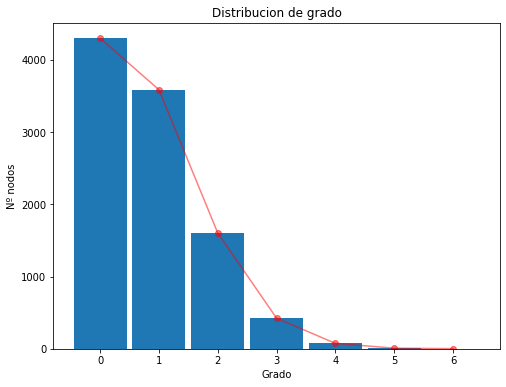

-------------------------------------------------------
Nodos = 10000
p = 0.0001
FASE CRÍTICA
          
MEDIDAS REALES
Grado medio = 0.9984000000000002
Nº enlaces = 4992.0
Grado de clustering = 5.666666666666667e-05
Componentes conexas = 5009.0
      
MEDIDAS TEÓRICAS
Grado medio = 0.9999
Nº enlaces = 4999.5
Grado de clustering = 9.999e-05


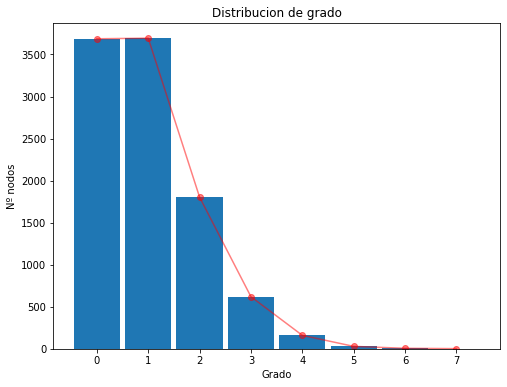

-------------------------------------------------------
Nodos = 10000
p = 0.0005
FASE SUPERCRÍTICA
          
MEDIDAS REALES
Grado medio = 4.98807
Nº enlaces = 24940.35
Grado de clustering = 0.0005422035839977014
Componentes conexas = 71.9
      
MEDIDAS TEÓRICAS
Grado medio = 4.9995
Nº enlaces = 24997.5
Grado de clustering = 0.00049995


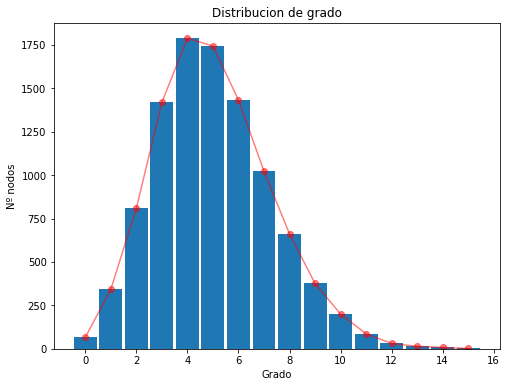

-------------------------------------------------------
Nodos = 10000
p = 0.001
FASE CONECTADA
          
MEDIDAS REALES
Grado medio = 10.00664
Nº enlaces = 50033.2
Grado de clustering = 0.001013657963877332
Componentes conexas = 1.5
      
MEDIDAS TEÓRICAS
Grado medio = 9.999
Nº enlaces = 49995.0
Grado de clustering = 0.0009999


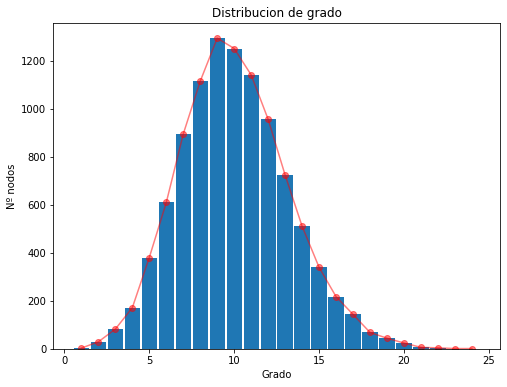

-------------------------------------------------------


In [ ]:
estudio_red_ER([10000], [0.000085, 0.0001, 0.0005, 0.001], 20)

--------------------------------------------------------------------------
##Generación de redes

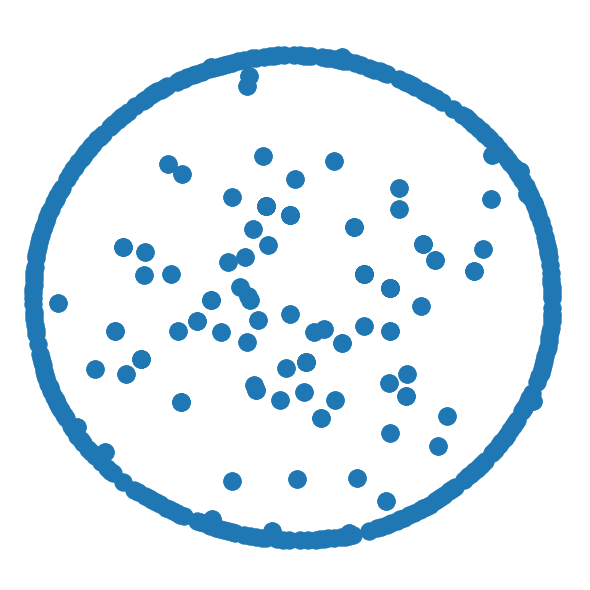

In [ ]:
grafo_erdos_renyi = nx.erdos_renyi_graph(500,0.001) #subcritica
#nx.write_graphml(grafo_erdos_renyi, "/content/gdrive/Shareddrives/SOC/Practica_Grupal_2/ER_n500_subcritic.graphml")
plt.figure(3, figsize = (8,8))
nx.draw_kamada_kawai(grafo_erdos_renyi)

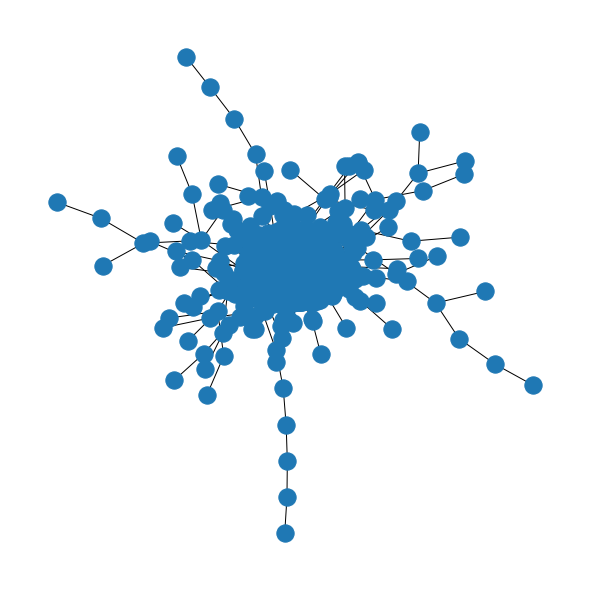

In [ ]:
grafo_erdos_renyi = nx.erdos_renyi_graph(500,0.002) #crítico
#nx.write_graphml(grafo_erdos_renyi, "/content/gdrive/Shareddrives/SOC/Practica_Grupal_2/ER_n500_critic.graphml")
plt.figure(3, figsize = (8,8))
nx.draw_kamada_kawai(grafo_erdos_renyi)

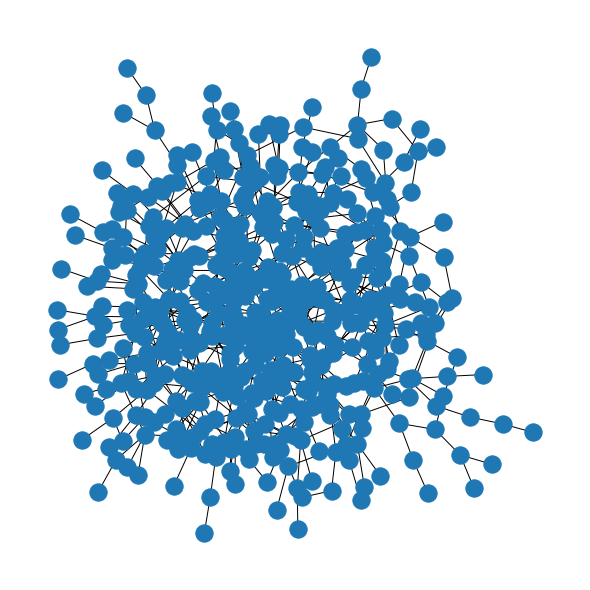

In [ ]:
grafo_erdos_renyi = nx.erdos_renyi_graph(500,0.005) #supercrítico
#nx.write_graphml(grafo_erdos_renyi, "/content/gdrive/Shareddrives/SOC/Practica_Grupal_2/ER_n500_supercritic.graphml")
plt.figure(3, figsize = (8,8))
nx.draw_kamada_kawai(grafo_erdos_renyi)

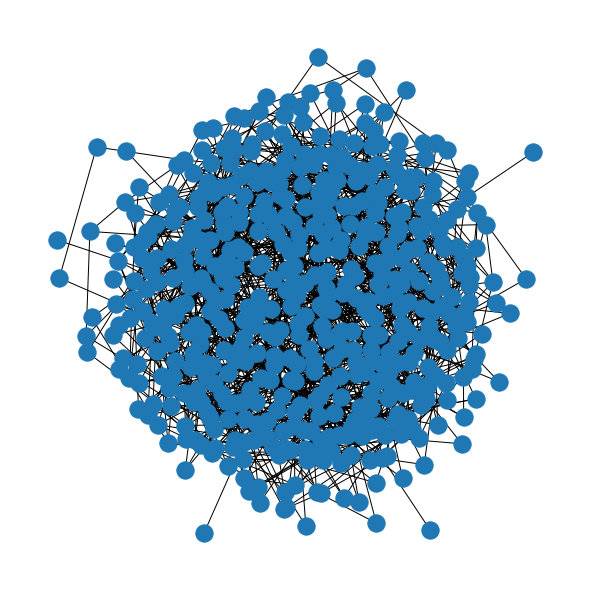

In [ ]:
grafo_erdos_renyi = nx.erdos_renyi_graph(500,0.012) #conectado
#nx.write_graphml(grafo_erdos_renyi, "/content/gdrive/Shareddrives/SOC/Practica_Grupal_2/ER_n500_connected.graphml")
plt.figure(3, figsize = (8,8))
nx.draw_kamada_kawai(grafo_erdos_renyi)

##Generación red similar a la práctica 1

Nodos = 10469
p = 0
FASE SUBCRÍTICA
          
MEDIDAS REALES
Grado medio = 0.0
Nº enlaces = 0.0
Grado de clustering = 0.0
Componentes conexas = 10469.0
      
MEDIDAS TEÓRICAS
Grado medio = 0
Nº enlaces = 0.0
Grado de clustering = 0.0


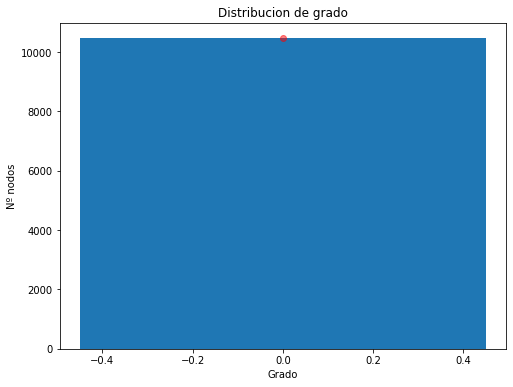

-------------------------------------------------------
Nodos = 10469
p = 0
FASE CRÍTICA
          
MEDIDAS REALES
Grado medio = 0.0
Nº enlaces = 0.0
Grado de clustering = 0.0
Componentes conexas = 10469.0
      
MEDIDAS TEÓRICAS
Grado medio = 0
Nº enlaces = 0.0
Grado de clustering = 0.0


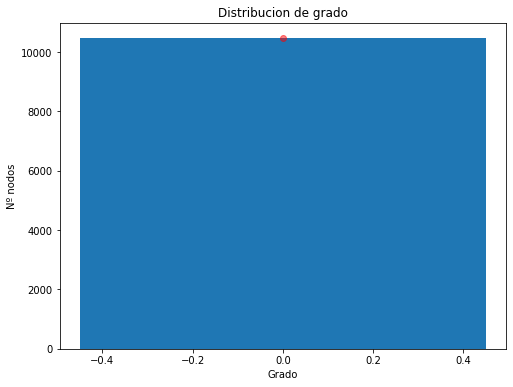

-------------------------------------------------------
Nodos = 10469
p = 0
FASE SUPERCRÍTICA
          
MEDIDAS REALES
Grado medio = 0.0
Nº enlaces = 0.0
Grado de clustering = 0.0
Componentes conexas = 10469.0
      
MEDIDAS TEÓRICAS
Grado medio = 0
Nº enlaces = 0.0
Grado de clustering = 0.0


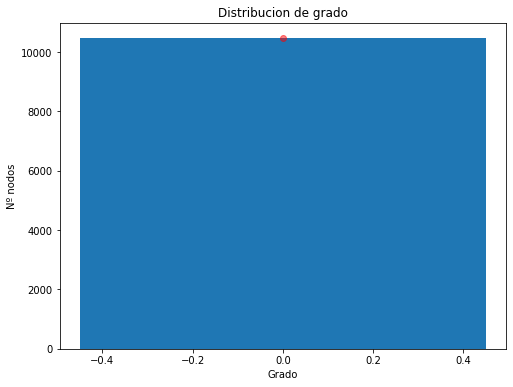

-------------------------------------------------------
Nodos = 10469
p = 0.00325
FASE CONECTADA
          
MEDIDAS REALES
Grado medio = 33.88594899226287
Nº enlaces = 177376.0
Grado de clustering = 0.003253773892418
Componentes conexas = 1.0
      
MEDIDAS TEÓRICAS
Grado medio = 34.021
Nº enlaces = 178082.9245
Grado de clustering = 0.0032496895596523068


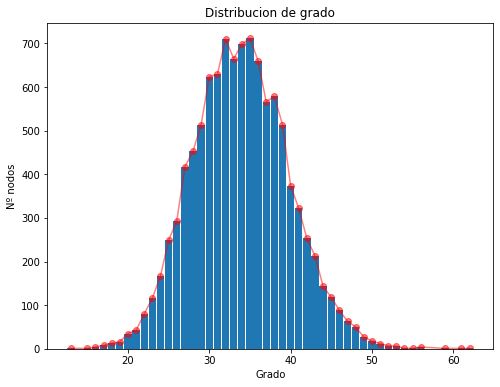

-------------------------------------------------------


In [ ]:
estudio_red_ER([10469], [0, 0, 0, 0.00325], 1)
#Las 3 primeras redes con p = 0 están para que en la cuarta salga "fase conectada"